## Dimension, distance distribution

In [36]:
import numpy as np
from sklearn.metrics import pairwise_distances


dims = [2, 3, 5, 10, 20, 30, 100]
n_samples = 1000
bin_size = 10

def distance_distribution(x, bin_size=10, n_seeds=10):

    def to_ratio(dist):
        dist.sort()
        base = dist[:bin_size].sum()
        ratio = np.asarray(
            [dist[i*bin_size:(i+1)*bin_size].sum()
             for i in range(n_samples//bin_size)]
        ) / base
        return ratio

    n_samples = x.shape[0]
    ratio = np.zeros(n_samples//bin_size)
    for i in range(n_seeds):
        dist = pairwise_distances(x[i].reshape(1,-1), x).reshape(-1)
        ratio += to_ratio(dist)
    return ratio / n_seeds


for dim in dims:
    x = np.random.random_sample((n_samples, dim))    
    ratio = distance_distribution(x) 

    print('\ndim = {}'.format(dim))
    print(ratio)


dim = 2
[ 1.          2.07706088  2.85394491  3.56089539  4.08601591  4.65690111
  5.15844314  5.6653683   6.08360864  6.48902589  6.86594871  7.28100784
  7.64482945  8.01936735  8.40310635  8.75113541  9.10926175  9.46466642
  9.82001419 10.1698837  10.51586096 10.82897356 11.14004487 11.46804414
 11.77929093 12.10883104 12.39840505 12.67197101 12.96322604 13.30017812
 13.61347452 13.89117187 14.1275313  14.38066455 14.61873385 14.87974197
 15.11483336 15.35007648 15.5943603  15.82447055 16.04732274 16.30877306
 16.55961046 16.79398876 16.99326165 17.19826475 17.41028861 17.63210932
 17.8491719  18.0788148  18.3221354  18.55185982 18.77115476 18.98815885
 19.18732227 19.36930021 19.56905867 19.76825452 19.99278252 20.23356732
 20.46167944 20.66908737 20.88795809 21.11869592 21.33345578 21.52900868
 21.70028107 21.8762008  22.07210772 22.24963028 22.46952014 22.67185911
 22.89934376 23.13129391 23.35613527 23.58360732 23.81819015 24.02952009
 24.23735049 24.43623985 24.67759172 24.92

In [37]:
import torchvision
mnist_data = torchvision.datasets.MNIST('./mnist/', download=True)

In [48]:
n_samples = 10000

mnist_x = mnist_data.train_data.numpy()[:n_samples]
mnist_x = mnist_x.reshape((mnist_x.shape[0], -1))
mnist_y = mnist_data.train_labels.numpy()[:n_samples]

# sort by label
def get_indices(idx):
    return np.where(mnist_y == idx)[0]
indices = np.concatenate([get_indices(i).reshape(-1) for i in range(10)])

mnist_x = mnist_x[indices]
mnist_y = mnist_y[indices]

In [5]:
from sklearn.manifold import TSNE

mnist_t_sne = TSNE(n_components=2, verbose=1)
mnist_z = mnist_t_sne.fit_transform(mnist_x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.377s...
[t-SNE] Computed neighbors for 10000 samples in 110.611s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 433.992151
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.924202
[t-SNE] Error after 1000 iterations: 1.775856


In [25]:
import numpy as np
from visualize import scatter
from visualize import mscatter
from bokeh.plotting import figure, output_notebook, show

output_notebook()

colors = [
    "yellow",
    "yellowgreen",
    "teal",
    "thistle",
    "tomato",
    "sienna",
    "salmon",
    "royalblue",
    "pink",
    "orange"
]


p = figure()
p.width=800
p.height=800

for i in range(10):
    indices = np.where(mnist_y == i)[0]
    zi = mnist_z[indices]
    yi = mnist_y[indices]
    p.scatter(zi[:,0], zi[:,1], fill_color=colors[i], marker='circle', size=3, alpha=0.8, legend='%d'%i)

show(p)

Loading BokehJS ...

In [38]:
mnist_distance_ratio = distance_distribution(mnist_x, bin_size=20, n_seeds=300)

In [39]:
mnist_distance_ratio

array([1.        , 1.1843291 , 1.24761351, 1.29195421, 1.32645118,
       1.3552743 , 1.38002118, 1.40203586, 1.42219333, 1.44030486,
       1.45694945, 1.4725158 , 1.48711137, 1.50099623, 1.51422766,
       1.52706288, 1.53927913, 1.55087283, 1.56210183, 1.57275965,
       1.5829579 , 1.59303455, 1.60292281, 1.61220374, 1.62121807,
       1.62991248, 1.63831055, 1.64642111, 1.65424187, 1.66158306,
       1.66884203, 1.67586898, 1.68264584, 1.68889476, 1.69504884,
       1.70106879, 1.70694585, 1.71250386, 1.71779846, 1.72300174,
       1.72800124, 1.73276966, 1.73737822, 1.74181201, 1.74623585,
       1.75054684, 1.7547711 , 1.75890654, 1.76298006, 1.76690586,
       1.7707396 , 1.77444687, 1.77811617, 1.78176684, 1.78530475,
       1.78871563, 1.79201085, 1.79520961, 1.79835729, 1.80147021,
       1.80457556, 1.80762168, 1.81057272, 1.81351492, 1.81634534,
       1.81914682, 1.82187413, 1.82452606, 1.82719553, 1.82982882,
       1.83244678, 1.83497904, 1.83754661, 1.84009373, 1.84260

## pairwise distance

### Euclidean

In [55]:
mnist_distance = pairwise_distances(mnist_x)

In [73]:
for i in range(mnist_distance.shape[0]):
    mnist_distance[i,i] = 1000

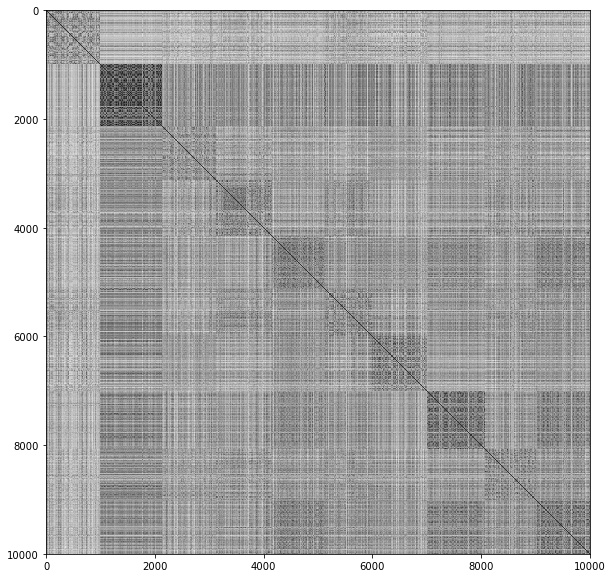

In [74]:
%matplotlib inline

import matplotlib.pyplot as plt
p = plt.figure(figsize=(10,10))
plt.imshow(mnist_distance, cmap='gray')
plt.show()

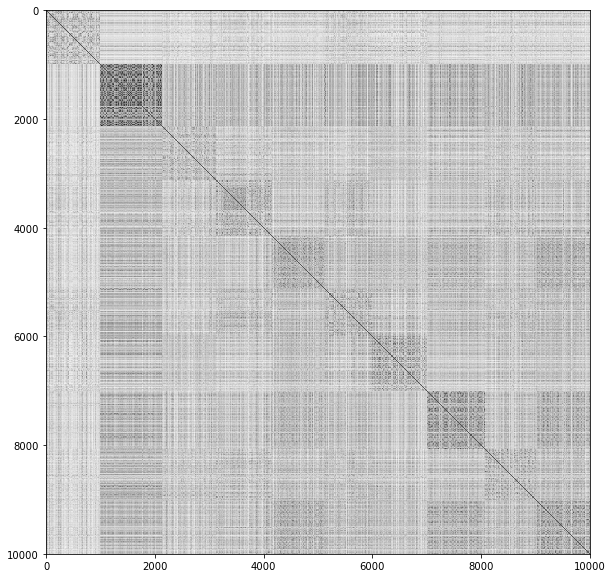

In [84]:
sigma = 2500
mnist_z_distance = -np.exp(-mnist_distance/sigma)
p = plt.figure(figsize=(10,10))
plt.imshow(mnist_z_distance, cmap='gray')
plt.show()

### Cosine

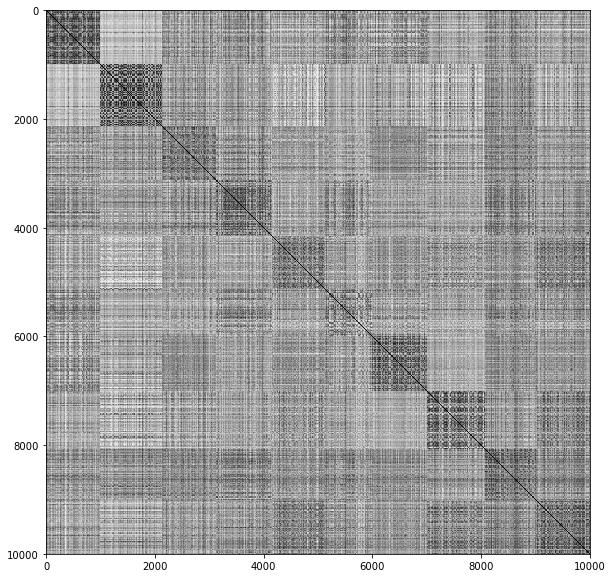

In [85]:
mnist_distance = pairwise_distances(mnist_x, metric='cosine')
p = plt.figure(figsize=(10,10))
plt.imshow(mnist_distance, cmap='gray')
plt.show()

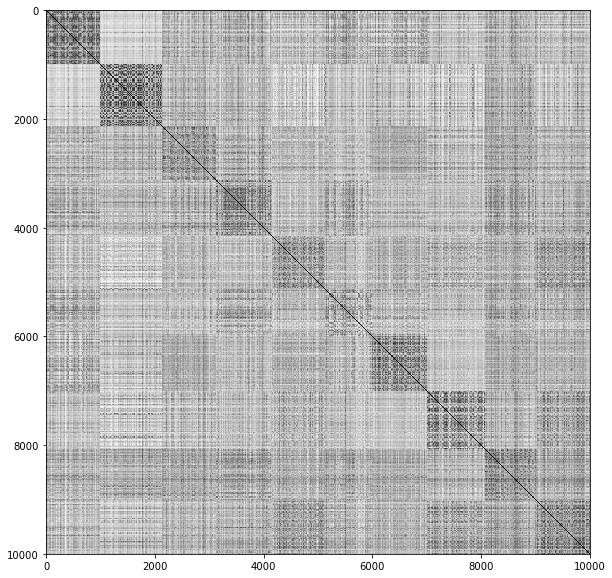

In [86]:
mnist_z_distance = -np.exp(-mnist_distance)
p = plt.figure(figsize=(10,10))
plt.imshow(mnist_z_distance, cmap='gray')
plt.show()

## 20 news group

In [108]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

newsgroups_train = fetch_20newsgroups(
    remove=('headers', 'footers', 'quotes')
)

texts = newsgroups_train.data
# newsgroup_x = TfidfVectorizer(min_df=5).fit_transform(texts)
newsgroup_x = CountVectorizer(min_df=0.0007, max_df=0.8).fit_transform(texts)
newsgroup_y = newsgroups_train.target

# sort by label
def get_indices(idx):
    return np.where(newsgroup_y == idx)[0]
indices = np.concatenate([get_indices(i).reshape(-1) for i in range(20)])

newsgroup_x = newsgroup_x[indices]
newsgroup_y = newsgroup_y[indices]

print(newsgroup_x.shape, newsgroup_y.shape)

(11314, 12746) (11314,)


In [109]:
newsgroup_distance = pairwise_distances(newsgroup_x, metric='cosine')

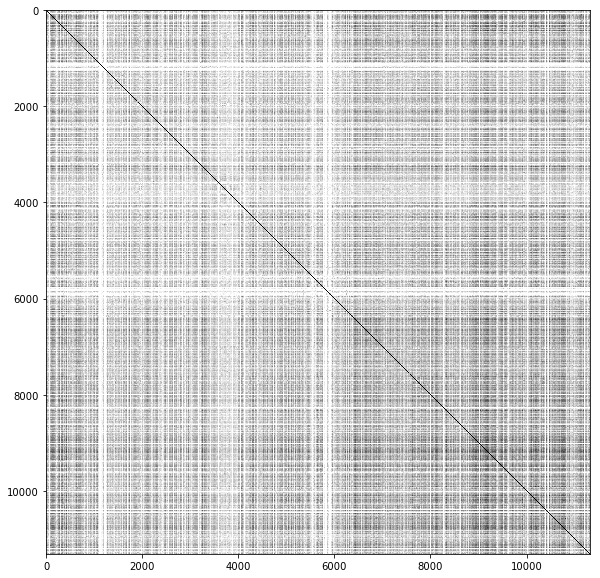

In [110]:
p = plt.figure(figsize=(10,10))
plt.imshow(newsgroup_distance, cmap='gray')
plt.show()

In [112]:
newsgroup_t_sne = TSNE(n_components=2, verbose=1, metric='cosine')
# sparse 가 구현되어 있지 않음
newsgroup_z = newsgroup_t_sne.fit_transform(newsgroup_x.todense())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11314 samples in 0.063s...
[t-SNE] Computed neighbors for 11314 samples in 5.799s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11314
[t-SNE] Computed conditional probabilities for sample 2000 / 11314
[t-SNE] Computed conditional probabilities for sample 3000 / 11314
[t-SNE] Computed conditional probabilities for sample 4000 / 11314
[t-SNE] Computed conditional probabilities for sample 5000 / 11314
[t-SNE] Computed conditional probabilities for sample 6000 / 11314
[t-SNE] Computed conditional probabilities for sample 7000 / 11314
[t-SNE] Computed conditional probabilities for sample 8000 / 11314
[t-SNE] Computed conditional probabilities for sample 9000 / 11314
[t-SNE] Computed conditional probabilities for sample 10000 / 11314
[t-SNE] Computed conditional probabilities for sample 11000 / 11314
[t-SNE] Computed conditional probabilities for sample 11314 / 11314
[t-SNE] Mean sigma: 0.134791
[t-SNE] KL divergence

In [120]:
p = figure()
p.width=800
p.height=800

for i in range(10):
    indices = np.where(newsgroup_y == i)[0]
    zi = newsgroup_z[indices]
    p.scatter(zi[:,0], zi[:,1], fill_color=colors[i%10], marker='circle', size=2, alpha=0.5, legend='%d'%i)

show(p)

## k-nn classifier

### MNIST

In [107]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(mnist_x, mnist_y)

mnist_y_pred = neigh.predict(mnist_x)
np.where(mnist_y_pred == mnist_y)[0].shape[0] / mnist_y.shape[0]

0.9669

### News group

- TF-IDF : 0.29556301926816336
- TF : 0.4568675976666077

In [219]:
# neigh = KNeighborsClassifier(n_neighbors=7, weights='uniform') # default is uniform. 성능 0.45 수준
neigh = KNeighborsClassifier(n_neighbors=7, weights='distance')
neigh.fit(newsgroup_x, newsgroup_y)

newsgroup_y_pred = neigh.predict(newsgroup_x)
np.where(newsgroup_y_pred == newsgroup_y)[0].shape[0] / newsgroup_y.shape[0]

0.9732190206823405

### Perplexity, sigma

In [138]:
n_data = 1000

# uniform
tsne_dist_sample_uniform = np.random.random_sample(n_data)

# leftside-skewed
tsne_dist_sample_leftside = tsne_sample_uniform ** (1/3)

# rightside-skewed
tsne_dist_sample_rightside = tsne_sample_uniform **(3)

tsne_dist_samples = [
    tsne_dist_sample_uniform,
    tsne_dist_sample_leftside,
    tsne_dist_sample_rightside
]

In [139]:
for tsne_dist_sample in tsne_dist_samples:
    hist, edges = np.histogram(tsne_dist_sample, density=True, bins=20)
    p = figure(background_fill_color="#E8DDCB", height=400, width=400)
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
       fill_color="#036564", line_color="#033649")
    show(p)

In [208]:
def get_entropy(dist_, var):
    prob = to_prob(dist_, var)
    entropy = - (prob * np.log(prob)).sum()
    return entropy

def to_prob(dist_, var):
    prob = np.exp(-(dist_.copy() ** 2) / var)
    prob = prob / prob.sum()
    return prob

def binary_search_variance(dist, perplexity=30.0, verbose=False):

    desired_entropy = np.log2(perplexity)

    var = 1
    decay = 0.9
    factor = 2

    previous_diff_sign = True

    for n_try in range(30):

        entropy = get_entropy(dist, var)
        entropy_diff = entropy - desired_entropy
        diff_sign = entropy_diff > 0

        if previous_diff_sign != diff_sign:
            factor = max(1, factor * decay)

        if entropy_diff > 0:
            var /= factor
        else:
            var *= factor

        if verbose:
            print('var = {:f}, perplexity = {:f}'.format(var, 2 ** entropy))

        previous_diff_sign = diff_sign
        if factor == 1:
            break

    return var, 2 ** entropy

binary_search_variance(tsne_dist_samples[0])

(0.007683824135139211, 29.465238645374722)

In [213]:
min_prob = 0.004

for dist in tsne_dist_samples:
    var, perplexity = binary_search_variance(dist, perplexity=50)
    prob = to_prob(dist, var)
    n_points = np.where(prob >= min_prob)[0].shape[0]
    print('num of points that having prob = {} at least (perplexity={:f})'.format(
        n_points, perplexity))

    hist, edges = np.histogram(-prob, density=True, bins=20)
    p = figure(background_fill_color="#E8DDCB", height=400, width=400)
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
       fill_color="#036564", line_color="#033649")
    show(p)

num of points that having prob = 124 at least (perplexity=49.012423)


num of points that having prob = 72 at least (perplexity=49.474939)


/home/lovit/anaconda2/envs/scrapper/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/lovit/anaconda2/envs/scrapper/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


num of points that having prob = 0 at least (perplexity=nan)


In [225]:
np.ceil(3.1)

4.0

In [257]:
import numpy as np
from sklearn.metrics import pairwise_distances

def most_closest_points(X, Y=None, metric='euclidean', topk=5, batch_size=500, verbose=False):
    if Y is None:
        Y = X

    topk_ = topk + 1
    n_data = X.shape[0]
    num_batch = int(np.ceil(n_data/batch_size))

    idxs = np.zeros((n_data, topk))
    dist = np.zeros((n_data, topk))

    for batch_idx in range(num_batch):
        b = batch_idx * batch_size
        e = (batch_idx + 1) * batch_size
        dist_ = pairwise_distances(X[b:e], Y, metric=metric)
        idxs_ = dist_.copy().argsort(axis=1)[:,1:topk_]
        idxs[b:e] = idxs_
        dist_.sort(axis=1)
        dist[b:e] = dist_[:,1:topk_]

        if verbose:
            print('batch {} / {}'.format(batch_idx+1, num_batch))

    return dist, idxs

In [280]:
dist, idxs = most_closest_points(newsgroup_x, verbose=True)

batch 1 / 23
batch 2 / 23
batch 3 / 23
batch 4 / 23
batch 5 / 23
batch 6 / 23
batch 7 / 23
batch 8 / 23
batch 9 / 23
batch 10 / 23
batch 11 / 23
batch 12 / 23
batch 13 / 23
batch 14 / 23
batch 15 / 23
batch 16 / 23
batch 17 / 23
batch 18 / 23
batch 19 / 23
batch 20 / 23
batch 21 / 23
batch 22 / 23
batch 23 / 23
